In [1]:
# K-Means Clustering

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
#load any dataset
from sklearn.datasets import load_iris
iris  = load_iris()
data = np.c_[iris.data, iris.target]
columns = np.append(iris.feature_names, ["target"])
data=pd.DataFrame(data, columns=columns)


In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
data.target.nunique()

3

In [5]:
data.target.unique()

array([0., 1., 2.])

In [6]:
#Question1
##Slice data remove label
No_target  = data.drop(['target'],axis = 1)
No_target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# Question2 
##Apply Kmeans
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters  = 3,random_state=9110)
Kmeans.fit(No_target)

KMeans(n_clusters=3, random_state=9110)

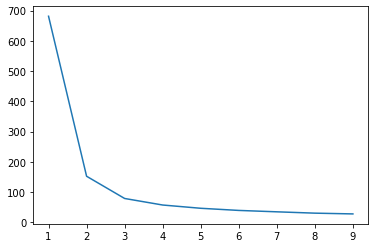

In [8]:
# Question3 
##Apply Elbow

All_intria = [ ]
for i in range(1,10):
    Kmeans = KMeans(n_clusters  = i,random_state=9110)
    Kmeans.fit(No_target)
    
    All_intria.append(Kmeans.inertia_)

plt.plot(range(1,10),All_intria)
plt.show()

looks like Best At 3 

In [9]:
data['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [10]:
# Question2 
##Apply Kmeans
print('True Target Value Count')
print(data['target'].value_counts())
print('___________test__________')
from sklearn.cluster import KMeans
for i in (1,10,100,1000):
    Kmeans = KMeans(n_clusters  = 3,random_state=9110 , max_iter = i)
    Kmeans.fit(No_target)
    data['kmean'] = Kmeans.labels_
    print(f'max iter = {i}')
    print(data['kmean'].value_counts())

    print(data['kmean'].value_counts())
    print('____________ ____________')

True Target Value Count
2.0    50
1.0    50
0.0    50
Name: target, dtype: int64
___________test__________
max iter = 1
2    60
1    50
0    40
Name: kmean, dtype: int64
2    60
1    50
0    40
Name: kmean, dtype: int64
____________ ____________
max iter = 10
0    62
1    50
2    38
Name: kmean, dtype: int64
0    62
1    50
2    38
Name: kmean, dtype: int64
____________ ____________
max iter = 100
0    62
1    50
2    38
Name: kmean, dtype: int64
0    62
1    50
2    38
Name: kmean, dtype: int64
____________ ____________
max iter = 1000
0    62
1    50
2    38
Name: kmean, dtype: int64
0    62
1    50
2    38
Name: kmean, dtype: int64
____________ ____________


10 iterration is enough here 

### play with others data sets

using  data set 
the n unique 3


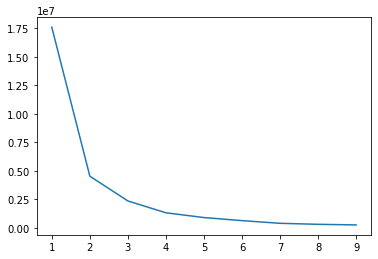

True Target Value Count
1.0    71
0.0    59
2.0    48
Name: target, dtype: int64
___________test__________
max iter = 1
2    68
0    63
1    47
Name: kmean, dtype: int64
____________ ____________
max iter = 10
0    69
2    62
1    47
Name: kmean, dtype: int64
____________ ____________
max iter = 100
0    69
1    62
2    47
Name: kmean, dtype: int64
____________ ____________
max iter = 1000
0    69
1    62
2    47
Name: kmean, dtype: int64
____________ ____________


In [11]:
#load any dataset
from sklearn.datasets import load_wine

data_sk  = load_wine()
data = np.c_[data_sk.data, data_sk.target]
print(f'using  data set ')
columns = np.append(data_sk.feature_names, ["target"])
data=pd.DataFrame(data, columns=columns)
print(f'the n unique {data.target.nunique()}')
No_target  = data.drop(['target'],axis = 1)
All_intria = [ ]
for i in range(1,10):
    Kmeans = KMeans(n_clusters  = i,random_state=9110)
    Kmeans.fit(No_target)
    
    All_intria.append(Kmeans.inertia_)

plt.plot(range(1,10),All_intria)
plt.show()
print('True Target Value Count')
print(data['target'].value_counts())
print('___________test__________')
from sklearn.cluster import KMeans
for i in (1,10,100,1000):
    Kmeans = KMeans(n_clusters  = data.target.nunique(),random_state=9110 , max_iter = i)
    Kmeans.fit(No_target)
    data['kmean'] = Kmeans.labels_
    print(f'max iter = {i}')
    print(data['kmean'].value_counts())
    print('____________ ____________')